In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.stats import norm
from scipy.stats import ttest_ind

In [2]:
# read files
sales = pd.read_csv('Sales.csv')
NYOP = pd.read_csv('NYOP.csv')
print(sales)
print(NYOP.head())

      Condition  NumberSold  Riders  MerchandiseRevenues
0            FR          77   12663              4592.41
1            FR          63   15561              6688.57
2    FR Charity          79   14796              6476.78
3    FR Charity         101   15796              5845.94
4          NYOP        1137   14077              4845.27
5          NYOP        1233   14186              7038.63
6  NYOP Charity         539   12227              5690.59
7  NYOP Charity         628   13741              6003.44
8  NYOP Charity         626   18117              8557.47
  Condition  Number  Price
0      NYOP       1   1.00
1      NYOP       1   1.00
2      NYOP       1   0.01
3      NYOP       1   0.10
4      NYOP       1   0.01


# Analysis #1 Flat Rate Pricing

In [3]:
# Filter the data for FR and FR Charity conditions
fr_data = sales[sales['Condition'] == 'FR']
fr_charity_data = sales[sales['Condition'] == 'FR Charity']

# Calculate total purchases and riders for both conditions
fr_total_sold = fr_data['NumberSold'].sum()
fr_total_riders = fr_data['Riders'].sum()

fr_c_total_sold = fr_charity_data['NumberSold'].sum()
fr_c_total_riders = fr_charity_data['Riders'].sum()

# Calculate the proportion of purchases
fr_p = fr_total_sold / fr_total_riders
fr_c_p = fr_c_total_sold/fr_c_total_riders

print(f'The proportion of FR purchases is {fr_p}.')
print(f'The proportion of FR Charity purchases is {fr_c_p}.')

The proportion of FR purchases is 0.00496031746031746.
The proportion of FR Charity purchases is 0.005883891213389121.


### 1a) Hypotheses:
Null Hypothesis (H₀): There is no difference in the proportion of purchases between FR and FR Charity (p₁ = p₂).

Alternative Hypothesis (H₁): There is a difference in the proportion of purchases between FR and FR Charity (p₁ ≠ p₂).


### 1b) Test Statistic

In [4]:
# According to the formula
z_1 = (fr_p - fr_c_p)/sqrt((fr_p*(1 - fr_p))/fr_total_riders + fr_c_p*(1 - fr_c_p)/fr_c_total_riders)
print(f'The test statistic is {z_1}.')

The test statistic is -1.5264554280529021.


### 1c) p-value

In [5]:
# Calculate the p-value for a two-tailed test
p_value_1 = 2 * (1 - norm.cdf(abs(z_1)))
print(f'The p-value is {p_value_1}.')

The p-value is 0.12689648269385967.


### 1d) Interpretation
At the 5% significance level (α = 0.05), we compare the p-value (0.1269) with α. Since 0.1269 > 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant difference in the proportion of purchases between the FR and FR Charity conditions.

# Analysis #2 NYOP Pricing 

In [6]:
# Filter the data for NYOP and NYOP Charity conditions
nyop_data = sales[sales['Condition'] == 'NYOP']
nyop_charity_data = sales[sales['Condition'] == 'NYOP Charity']

# Calculate total purchases and riders for both conditions
nyop_total_sold = nyop_data['NumberSold'].sum()
nyop_total_riders = nyop_data['Riders'].sum()

nyop_c_total_sold = nyop_charity_data['NumberSold'].sum()
nyop_c_total_riders = nyop_charity_data['Riders'].sum()

# Calculate the proportion of purchases
nyop_p = nyop_total_sold / nyop_total_riders
nyop_c_p = nyop_c_total_sold/nyop_c_total_riders

print(f'The proportion of NYOP purchases is {nyop_p}.')
print(f'The proportion of NYOP Charity purchases is {nyop_c_p}.')

The proportion of NYOP purchases is 0.08385521706825178.
The proportion of NYOP Charity purchases is 0.04067143019167517.


### 2a) Hypotheses:
Null Hypothesis (H₀): There is no difference in the proportion of purchases between NYOP and NYOP Charity (nyop_p = nyop_c_p).

Alternative Hypothesis (H₁): There is a difference in the proportion of purchases between NYOP and NYOP Charity (nyop_p ≠ nyop_c_p).

### 2b) Test Statistic

In [7]:
# According to the formula
z_2 = (nyop_p - nyop_c_p)/sqrt((nyop_p*(1 - nyop_p))/nyop_total_riders + nyop_c_p*(1 - nyop_c_p)/nyop_c_total_riders)
print(f'The test statistic is {z_2}.')

The test statistic is 22.749707261972425.


### 2c) p-value

In [8]:
# Calculate the p-value for a two-tailed test
p_value_2 = 2 * (1 - norm.cdf(abs(z_2)))
print(f'The p-value is {p_value_2}.')

The p-value is 0.0.


### 2d) Interpretation
Given the extremely small p-value (essentially 0), we reject the null hypothesis. This means there is a statistically significant difference in the proportion of purchases between the NYOP and NYOP Charity conditions.

# Analysis #3 NYOP unit price

### 3a) Modify NYOP.csv

In [9]:
nyop_data = NYOP

# Create UnitPrice by dividing Price by Number
nyop_data['UnitPrice'] = nyop_data['Price'] / nyop_data['Number']

# Change the 'Number' column to a categorical type
nyop_data['Number'] = nyop_data['Number'].astype('category')

In [10]:
print(nyop_data.head())

  Condition Number  Price  UnitPrice
0      NYOP      1   1.00       1.00
1      NYOP      1   1.00       1.00
2      NYOP      1   0.01       0.01
3      NYOP      1   0.10       0.10
4      NYOP      1   0.01       0.01


### 3b) BOX PLOTS and Interpretation

<Figure size 1000x500 with 0 Axes>

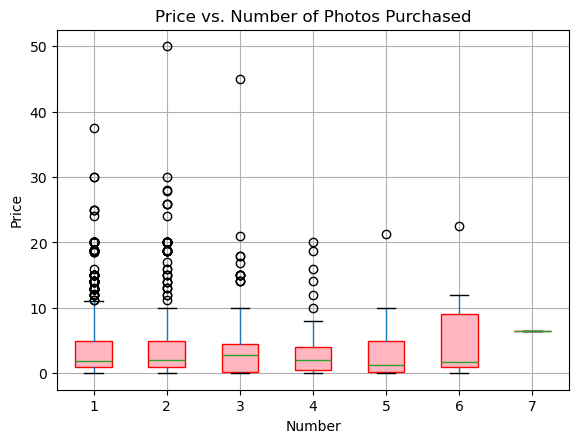

<Figure size 1000x500 with 0 Axes>

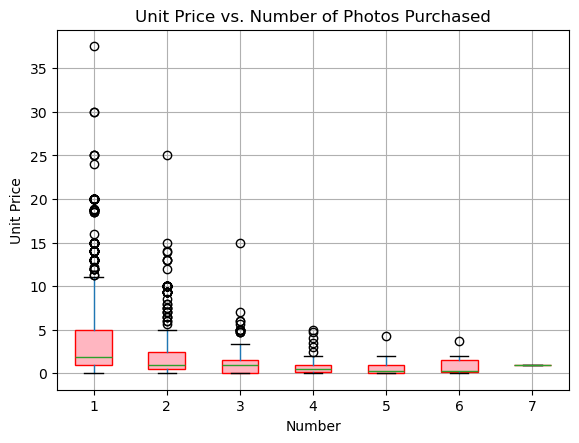

In [20]:
# b. Visualize both Price and UnitPrice against the factor variable, Number by creating box plots and interpreting them.
import matplotlib.pyplot as plt

# Visualize 'Price' against 'Number'
plt.figure(figsize=(10, 5))
nyop_data.boxplot(column='Price', by='Number', patch_artist = True, boxprops = dict(facecolor = "lightpink", color = "red"))
plt.title('Price vs. Number of Photos Purchased')
plt.suptitle('')
plt.ylabel('Price')
plt.show()

# Visualize 'UnitPrice' against 'Number'
plt.figure(figsize=(10, 5))
nyop_data.boxplot(column='UnitPrice', by='Number', patch_artist = True, boxprops = dict(facecolor = "lightpink", color = "red"))
plt.title('Unit Price vs. Number of Photos Purchased')
plt.suptitle('')
plt.ylabel('Unit Price')
plt.show()


For the Price vs. Number of pictures, the price generally increases with the number of pictures, but there are many outliers, especially for smaller purchases.

For the UnitPrice vs. Number of pictures, the unit price decreases as more pictures are purchased, which is expected due to bulk purchasing or discounts. There are still a few outliers, but the overall trend is downward.

### 3c) Calculate mean price

In [12]:
nyop_avg_unit_price = nyop_data[nyop_data['Condition'] == 'NYOP']['UnitPrice'].mean()
nyop_charity_avg_unit_price = nyop_data[nyop_data['Condition'] == 'NYOP Charity']['UnitPrice'].mean()
print(f'The avg unit price for NYOP is {nyop_avg_unit_price}.')
print(f'The avg unit price for NYOP Charity is {nyop_charity_avg_unit_price}.')

The avg unit price for NYOP is 1.0404387568555757.
The avg unit price for NYOP Charity is 5.6804804392587505.


### 3d) Hypotheses
Null Hypothesis (H₀): The average unit prices for NYOP and NYOP Charity are equal. (mu1 = mu2)

Alternative Hypothesis (H₁): The average unit prices for NYOP and NYOP Charity are different. (mu1 ≠ mu2)

### 3e) Pyrsm test

In [13]:
# What is the likelihood to make either a Type I or Type II error based on your conclusion?
import pyrsm as rsm

cm = rsm.basics.compare_means(
    data={"nyop_data": nyop_data},
    var1="Condition",  # NYOP and NYOP Charity conditions
    var2="UnitPrice",  # UnitPrice is the variable to compare
    alt_hyp="two-sided"  # Two-sided hypothesis
)

# Get the summary of the results
cm.summary()

Pairwise mean comparisons (t-test)
Data      : nyop_data
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP  1.04 1641          0 1.305 0.032 0.063
NYOP Charity  5.68 1457          0 4.670 0.122 0.240
          Null hyp.                      Alt. hyp.  diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.64  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### 3f) Difference in mean

In [23]:
# Filter the data for riders who purchased exactly 1 picture
one_picture = nyop_data[nyop_data['Number'] == 1]

# Compare means for people who purchased 1 picture
cm_one = rsm.basics.compare_means(
    data={"one_picture": one_picture},
    var1="Condition",  # NYOP vs NYOP Charity for 1 picture
    var2="UnitPrice",
    alt_hyp="two-sided"
)
cm_one.summary() 

Pairwise mean comparisons (t-test)
Data      : one_picture
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP 1.177 1162          0 1.432 0.042 0.082
NYOP Charity 5.941 1203          0 4.830 0.139 0.273
          Null hyp.                      Alt. hyp.   diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.765  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [22]:
# Filter the data for riders who purchased exactly 6 pictures
six_pictures = nyop_data[nyop_data['Number'] == 6]

# Compare means for people who purchased 6 pictures
cm_six = rsm.basics.compare_means(
    data={"six_pictures": six_pictures},
    var1="Condition",  # NYOP vs NYOP Charity for 6 pictures
    var2="UnitPrice",
    alt_hyp="two-sided"
)
cm_six.summary() 

Pairwise mean comparisons (t-test)
Data      : six_pictures
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean  n  n_missing    sd    se    me
        NYOP 0.495  6          0 0.615 0.251 0.646
NYOP Charity 1.970  3          0 1.795 1.036 4.459
          Null hyp.                      Alt. hyp.   diff p.value  
NYOP = NYOP Charity NYOP not equal to NYOP Charity -1.475   0.288  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### 3g) Calculated by hand

In [29]:
# Filter data for people who purchased 1 picture and 6 pictures for NYOP and NYOP Charity
nyop_six_pictures_data = nyop_data[(nyop_data['Number'] == 6) & (nyop_data['Condition'] == 'NYOP')]

nyop_c_six_pictures_data = nyop_data[(nyop_data['Number'] == 6) & (nyop_data['Condition'] == 'NYOP Charity')]

# Calculate the average UnitPrice for both groups
nyop_six_pictures_avg_price = nyop_six_pictures_data['UnitPrice'].mean()

nyop_c_six_pictures_avg_price = nyop_c_six_pictures_data['UnitPrice'].mean()

# Output the results for comparison
print(f"For NYOP pricing strategy, average Unit Price for people who purchased 6 pictures: {nyop_six_pictures_avg_price}")
print(f"For NYOP Charity pricing strategy, average Unit Price for people who purchased 1 picture: {nyop_c_six_pictures_avg_price}")

For NYOP pricing strategy, average Unit Price for people who purchased 6 pictures: 0.49499999999999994
For NYOP Charity pricing strategy, average Unit Price for people who purchased 1 picture: 1.97


The analysis by hand for the group that purchased 6 pictures are the same as those produced above. Because we use the whole dataset, we avoid the problems associated with small sample sizes, the means and variances computed from the full data are actual parameters of the population, not just estimates based on a sample. 

# Analysis #4 Economics

### 4a） Profit of the four pricing strategies

In [15]:
nyop = pd.read_csv('NYOP.csv')
nyop

,Condition,Number,Price
0,NYOP,1,1.00
1,NYOP,1,1.00
2,NYOP,1,0.01
3,NYOP,1,0.10
4,NYOP,1,0.01
...,...,...,...
3093,NYOP Charity,1,9.38
3094,NYOP Charity,1,1.00
3095,NYOP Charity,1,0.93
3096,NYOP Charity,1,9.38


In [16]:
# Total sales for NYOP and NYOP Charity. 
nyop_total_sale = nyop[nyop['Condition'] == 'NYOP']['Price'].sum()
nyop_c_total_sale = nyop[nyop['Condition'] == 'NYOP Charity']['Price'].sum()
print(nyop_total_sale, nyop_c_total_sale)

2175.8 9616.310000000001


In [17]:
# Calculate each daily profit
fr_daily_profit = fr_total_sold * (12.95 - 1.2) / 2
fr_c_daily_profit = fr_c_total_sold * (12.95 - 1.2) / 2 / 2
nyop_daily_profit = (nyop_total_sale - nyop_total_sold*1.2)/2
nyop_c_daily_profit = ncdp = (nyop_c_total_sale - nyop_c_total_sold*1.2)/3/2

print(fr_daily_profit, fr_c_daily_profit, nyop_daily_profit, nyop_c_daily_profit)

822.5 528.75 -334.0999999999999 1244.1183333333336


### 4b) Ranking
NYOP Charity is the most profitable pricing strategy.

The ranking is：#1 NYOP Charity($1244.12), #2 FR($822.5), #3 FR Charity($528.75), #4 NYOP (-$334.10)

### 4c) Social profits

In [18]:
# Social profits come from 50% of charity pricing strategies
fr_c_daily_social_profit = fr_c_total_sold * (12.95 - 1.2) / 2 / 2
nyop_c_daily_social_profit = (nyop_c_total_sale - nyop_c_total_sold*1.2)/3/2
print(f'The daily social profit for FR Charity is ${fr_c_daily_social_profit}, for NYOP Charity is ${nyop_c_daily_social_profit}. Still, NYOP Charity strategies is #1.' )

The daily social profit for FR Charity is $528.75, for NYOP Charity is $1244.1183333333336. Still, NYOP Charity strategies is #1.


### 4d) Whole year social profits from leading strategy

In [19]:
fr_c_year_social_profit = fr_c_daily_social_profit * 365
nyopc_c_year_social_profit = nyop_c_daily_social_profit * 365
additional_year_social_profit = nyopc_c_year_social_profit - fr_c_year_social_profit
print(f'The whole year social profits from leading strategy is ${nyopc_c_year_social_profit}. This is ${additional_year_social_profit} more than that of FR charity strategy.')

The whole year social profits from leading strategy is $454103.19166666677. This is $261109.44166666677 more than that of FR charity strategy.


### 4e) Merchandise

In [27]:
grouped_sales = sales.groupby('Condition').sum()

In [28]:
merchandise_revenue_per_riders = grouped_sales['MerchandiseRevenues'] / grouped_sales['Riders']

merchandise_revenue_per_riders


Condition
FR              0.399695
FR Charity      0.402809
NYOP            0.420476
NYOP Charity    0.459374
dtype: float64

Total result suggests that increased customers photo revenue does not lead to decreased merchandise revenue. There were almost no differences between in merchandise sales over the same days. Even if it is so, people only spent slightly more, so we can exclude the concern about merchandise sales.